# T test

---

If calculated t-value is larger than the tabled value at the desired significance level (alpha = .01), we can reject the null hypothesis and accept the alternative hypothesis, namely, that the difference is likely the result of the experimental treatment and not the result of chance variation. <br/>


---

In [1]:
from scipy import stats as st
from scipy.stats import t

import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# define probability
p = 0.95
df = 10

# retrieve value <= probability
value = t.ppf(p, df)
print(value)

# confirm with cdf
p = t.cdf(value, df)
print(p)

1.8124611228107335
0.949999999999923


### Two sample t test

---

#### Related samples

#### Data with significant deviation

Score1 - before training or experiment
Score2 - after training or experiment

In [3]:
df = pd.DataFrame([[0.840532,0.187758],
[0.840536,0.187758],
[0.840536,0.187758],
[0.844854,0.187758],
[0.850156,0.188937],
[0.852761,0.170922],
[0.854834,0.170922],
[0.854995,0.170922],
[0.858958,0.172603],
[0.882185,0.170568]])

In [4]:
df.columns = ['score1', 'score2']

In [5]:
df

,score1,score2
0,0.840532,0.187758
1,0.840536,0.187758
2,0.840536,0.187758
3,0.844854,0.187758
4,0.850156,0.188937
5,0.852761,0.170922
6,0.854834,0.170922
7,0.854995,0.170922
8,0.858958,0.172603
9,0.882185,0.170568


In [6]:
df['score1'].mean(), df['score2'].mean()

(0.8520347000000001, 0.17959060000000002)

In [7]:
df['diff'] = df['score1'] - df['score2']

In [8]:
# df.drop([<column>], axis=1, inplace=True)

In [9]:
df

,score1,score2,diff
0,0.840532,0.187758,0.652774
1,0.840536,0.187758,0.652778
2,0.840536,0.187758,0.652778
3,0.844854,0.187758,0.657096
4,0.850156,0.188937,0.661219
5,0.852761,0.170922,0.681839
6,0.854834,0.170922,0.683912
7,0.854995,0.170922,0.684073
8,0.858958,0.172603,0.686355
9,0.882185,0.170568,0.711617


In [10]:
df['sq.diff'] = df['diff']**2

In [11]:
df

,score1,score2,diff,sq.diff
0,0.840532,0.187758,0.652774,0.426114
1,0.840536,0.187758,0.652778,0.426119
2,0.840536,0.187758,0.652778,0.426119
3,0.844854,0.187758,0.657096,0.431775
4,0.850156,0.188937,0.661219,0.437211
5,0.852761,0.170922,0.681839,0.464904
6,0.854834,0.170922,0.683912,0.467736
7,0.854995,0.170922,0.684073,0.467956
8,0.858958,0.172603,0.686355,0.471083
9,0.882185,0.170568,0.711617,0.506399


In [12]:
sum_of_sq_diff = df['sq.diff'].sum()
sum_of_sq_diff

4.525415704529

In [13]:
sum_of_diff = df['diff'].sum()
sum_of_diff

6.724441000000001

In [14]:
sum_of_diff_sq = sum_of_diff**2
sum_of_diff_sq

45.21810676248101

In [15]:
n = len(df)
n

10

In [16]:
t = (sum_of_diff / n) / m.sqrt((sum_of_sq_diff - (sum_of_diff_sq/n))/((n-1)*n))
t

106.24857258398843

In [17]:
st.ttest_rel(df['score1'], df['score2'])

Ttest_relResult(statistic=106.24857258398407, pvalue=2.9413520144357917e-15)

#### The t-statistic is the same as the one computed manually

Manual - 106.25 <br/>
Scipy - 106.25

Tabled value or critical value of t is 1.81.

### <b>Calculated value is greater than t-critical</b>. Hence we can reject the null hypothesis!

### One sample t test using Scipy

In [18]:
st.ttest_1samp(df['score1'], 0.852)

Ttest_1sampResult(statistic=0.008717651568261334, pvalue=0.9932345889498624)

In [19]:
st.ttest_1samp(df['score1'], 0.88)

Ttest_1sampResult(statistic=-7.025698599444874, pvalue=6.148065660425938e-05)

In [20]:
t_critical = np.arange(830,880)/1000
t_critical

array([0.83 , 0.831, 0.832, 0.833, 0.834, 0.835, 0.836, 0.837, 0.838,
       0.839, 0.84 , 0.841, 0.842, 0.843, 0.844, 0.845, 0.846, 0.847,
       0.848, 0.849, 0.85 , 0.851, 0.852, 0.853, 0.854, 0.855, 0.856,
       0.857, 0.858, 0.859, 0.86 , 0.861, 0.862, 0.863, 0.864, 0.865,
       0.866, 0.867, 0.868, 0.869, 0.87 , 0.871, 0.872, 0.873, 0.874,
       0.875, 0.876, 0.877, 0.878, 0.879])

In [21]:
pvals = []
t_stats = []
for t in t_critical:
    pvals.append(st.ttest_1samp(df['score1'], t)[0])
    t_stats.append(st.ttest_1samp(df['score1'], t)[1])

print('last result: ', st.ttest_1samp(df['score1'], t))
# pvals, t_stats

last result:  Ttest_1sampResult(statistic=-6.774469447622977, pvalue=8.136478973698161e-05)


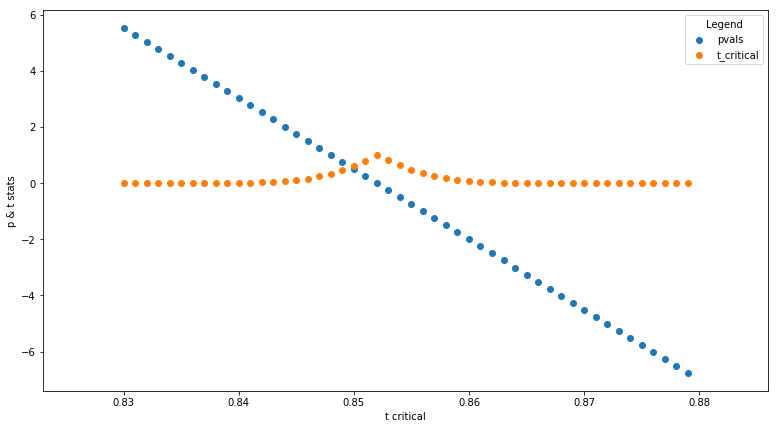

In [22]:
plt.figure(figsize=(13,7))

plt.scatter(t_critical, pvals)
plt.scatter(t_critical, t_stats)

plt.xlabel('t critical')
plt.ylabel('p & t stats')

plt.legend(['pvals', 't_critical'], loc='upper right', title='Legend')

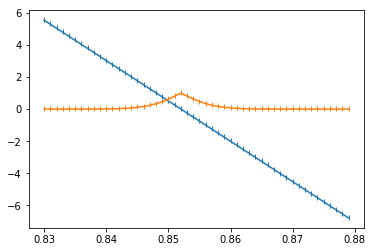

In [23]:
markers_on = [1,1]

plt.plot(t_critical, pvals, marker=markers_on)
plt.plot(t_critical, t_stats, marker=markers_on)

### Two sample t test (samples with similar means)

In [24]:
df_ = pd.DataFrame([[0.840532,0.887758],
[0.840536,0.887758],
[0.840536,0.887758],
[0.844854,0.887758],
[0.850156,0.888937],
[0.852761,0.870922],
[0.854834,0.870922],
[0.854995,0.870922],
[0.858958,0.872603],
[0.882185,0.870568],])

In [25]:
df_.columns = ['score1','score2']

In [26]:
df_

,score1,score2
0,0.840532,0.887758
1,0.840536,0.887758
2,0.840536,0.887758
3,0.844854,0.887758
4,0.850156,0.888937
5,0.852761,0.870922
6,0.854834,0.870922
7,0.854995,0.870922
8,0.858958,0.872603
9,0.882185,0.870568


In [27]:
df_['score1'].mean(), df_['score2'].mean()

(0.8520347000000001, 0.8795906)

In [28]:
st.ttest_ind(df_['score1'], df_['score2'])

Ttest_indResult(statistic=-5.656611103408039, pvalue=2.2940533800702873e-05)

Tabled value or critical value of t is 1.81.

### <b>Calculated value is less than t-critical</b>. Hence we cannot reject the null hypothesis!